# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Labels.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

### **Note: Please use GPU runtime on Google Colab to execute the code faster.**

## Importing necessary libraries

In [125]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install tensorflow==2.18.0 scikit-learn==1.3.2 seaborn==0.13.1 matplotlib==3.8.0 numpy==1.26 pandas==2.2.2 opencv-python==4.8.0.76 -q --user

In [126]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
#!pip install tensorflow==2.13.0 scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 opencv-python==4.8.0.76 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [127]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [128]:
# Uncomment and run the below code if you are using google colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
# Load the image file of the dataset
url = '/content/drive/MyDrive/Colab Notebooks/Computer Vision/Project/'
images = np.load(os.path.join(url, 'images.npy'))

# Load the labels file of the dataset
labels = pd.read_csv(os.path.join(url,'Labels.csv'))

## Data Overview

### Understand the shape of the dataset

In [130]:
print(images.shape) # shape of the images
print(labels.shape) # shape of the labels

(4750, 128, 128, 3)
(4750, 1)


Observations:
- There are 4750 images of shape 128x128 with 3 color channels
- There are 4750 labels of one column

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

1. How are these different category plant images different from each other?

In [131]:
# print images of plants from each category
def plot_images(images, labels):
    categories = labels['Label'].unique()

    # Create a dictionary to store one image index per category
    category_images = {}
    for category in categories:
        # Get indices of images belonging to the current category
        image_indices = labels.index[labels['Label'] == category].tolist()
        # Select a random image from the category
        category_images[category] = np.random.choice(image_indices)

    # Display images
    fig, axes = plt.subplots(3, 4, figsize=(10, 8))  # Create subplots (3 rows, 4 columns)
    fig.suptitle('Plant Seedling Images from Different Categories', fontsize=16)

    ax_index = 0  # Keep track of subplot index
    for category, image_index in category_images.items():
        row = ax_index // 4  # Calculate row index
        col = ax_index % 4   # Calculate column index

        axes[row, col].imshow(images[image_index])  # Display image
        axes[row, col].set_title(category)  # Set title to category name
        axes[row, col].axis('off')  # Turn off axis ticks

        ax_index += 1

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent title overlap
    plt.show()

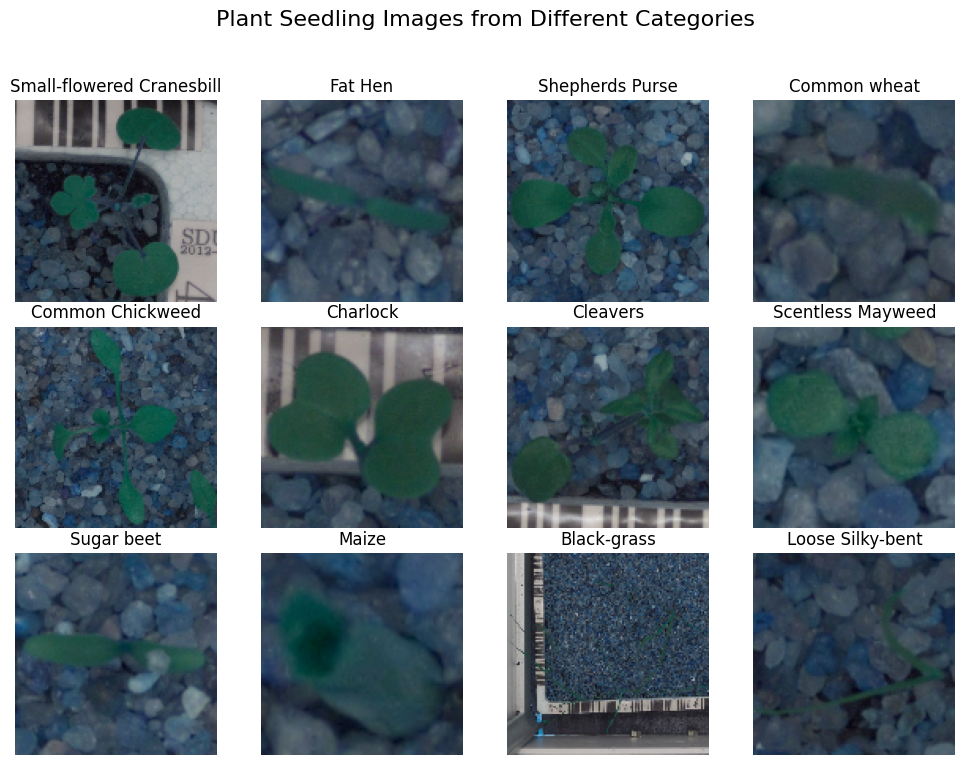

In [132]:
plot_images(images,labels)

Observations:

Below are some of the visual differences of the plants from different categories
- Small- flowered Cranesbill : The leaf of this plant is flowered shaped.
- Fat Hen: The leaf is this plant is thin, long and oval shaped.
- Sheperds Purse :  Its bunch of leaves at the base. The leaves has smooth edged or deeply lobed.
- Common Wheat:  The leaves are  long, narrow and have a linear shape. Its like a blade of grass, but its wider and flatter
- Common Chickweed :  The leaves are small, oval-shaped, and have a pointed tip. They are wider near the base and taper towards the tip.
- Charlock :  The leaves are elongated and have irregular lobes. They are wider near the tip and taper towards the base.
- Cleavers :  The leaves are lance-shaped ,come to a point at the tip.
- Scentless Mayweed :  this image looks like baby leaves image, wider in the middle and tapered at the end and oval shaped
- Sugar beet :  Thin long tapered leaf
- Maize :  lance shaped leaves
- Black-grass : Black-grass typically has narrow, linear leaves that taper to a point
- Loosely Silky-bent : Loose Silky-bent has narrow, linear leaves



2. Is the dataset provided an imbalance? (Check with using bar plots)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Loose Silky-bent'),
  Text(1, 0, 'Common Chickweed'),
  Text(2, 0, 'Scentless Mayweed'),
  Text(3, 0, 'Small-flowered Cranesbill'),
  Text(4, 0, 'Fat Hen'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Sugar beet'),
  Text(7, 0, 'Cleavers'),
  Text(8, 0, 'Black-grass'),
  Text(9, 0, 'Shepherds Purse'),
  Text(10, 0, 'Common wheat'),
  Text(11, 0, 'Maize')])

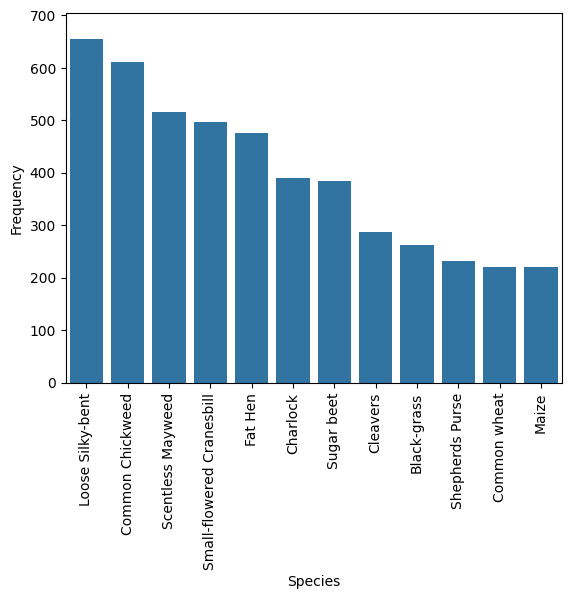

In [133]:
 #checking for dataset imbalance using bar plot
species_counts = labels['Label'].value_counts() # Calculate frequencies
max_frequency = species_counts.max()
sns.barplot(x=species_counts.index, y=species_counts.values) # pass into plot
plt.ylim(0, max_frequency + 50) # for better visualization
plt.xlabel('Species')
plt.ylabel('Frequency')
plt.xticks(rotation='vertical')

Observations:
- From the Barplot, we see that there is imbalance of data among the 12 different categories
  - Loosely Silky-bent has the highest number of images, followed by Common Chickweed and then Scentless Mayweed
  - Shepherds Purse, Common wheat and Maize have least number of images.

## Data Pre-Processing

### Convert the BGR images to RGB images.

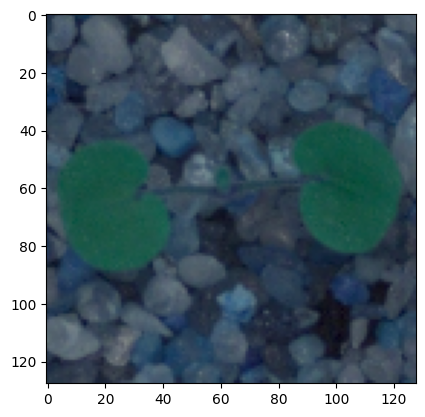

In [134]:
#print some of the images before conversion of BGR images to RGB images
plt.imshow(images[0])


Observations:
- The image is blue in color since its in BGR format.

In [135]:
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

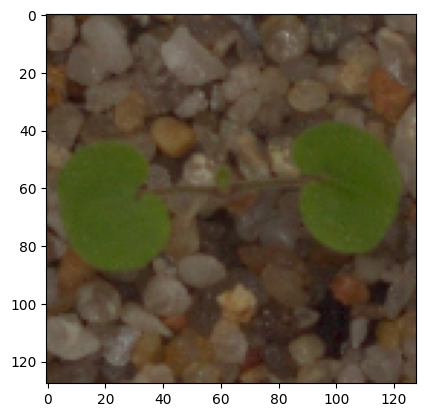

In [136]:
#print some of the images
plt.imshow(images[0])

Observations:
- The image is now converted into RGB format and we dont see the blue color anymore.

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

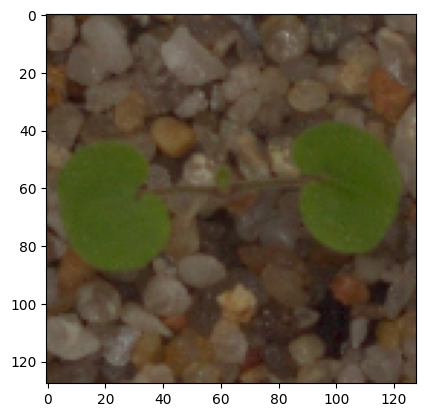

In [137]:
#example image before resizing
plt.imshow(images[0])

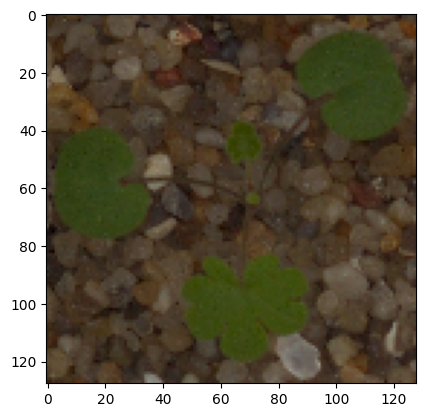

In [138]:
plt.imshow(images[1])

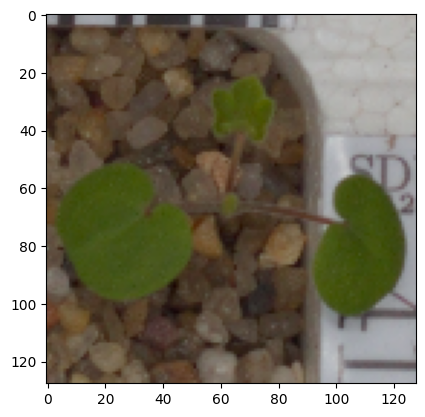

In [139]:
plt.imshow(images[2])

In [140]:
images_resized=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_resized.append( cv2.resize(images[i], dimensions, interpolation=None))

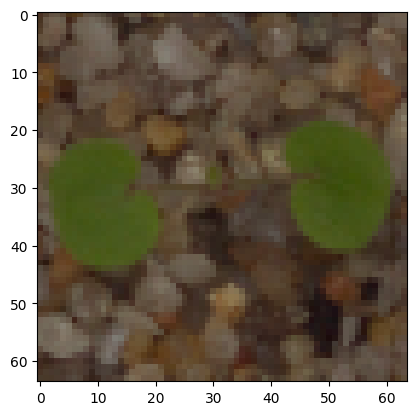

In [141]:
#after resizing with interpolation = None
plt.imshow(images_resized[0])

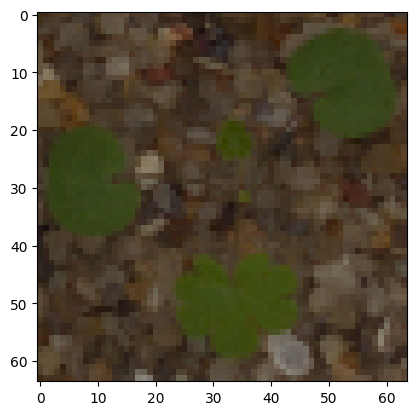

In [142]:
#after resizing with interpolation = None
plt.imshow(images_resized[1])

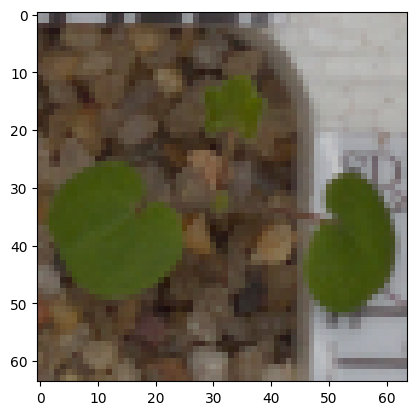

In [143]:
#after resizing with interpolation = None
plt.imshow(images_resized[2])

In [144]:
#Use INTER_NEAREST for preserving sharp edges in images
images_resized=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_resized.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_NEAREST))

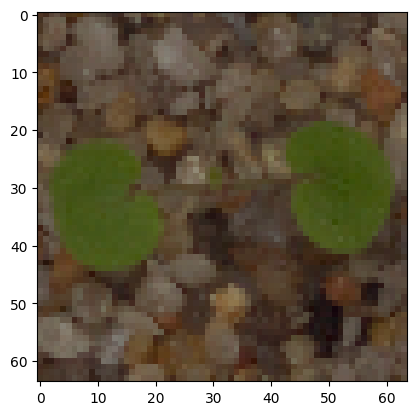

In [145]:
#after resizing with interpolation as INTER_NEAREST
plt.imshow(images_resized[0])

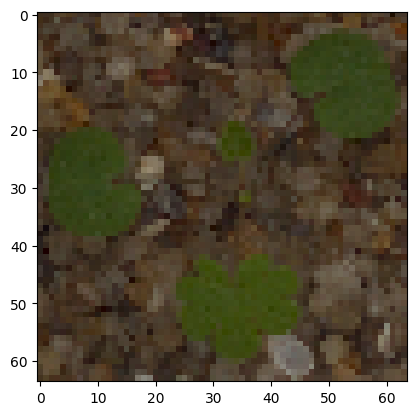

In [146]:
#after resizing with interpolation as INTER_NEAREST
plt.imshow(images_resized[1])

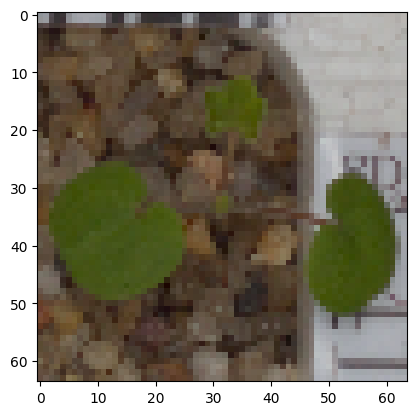

In [147]:
#after resizing with interpolation as INTER_NEAREST
plt.imshow(images_resized[2])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [148]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_resized),labels , test_size=0.1, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.1, random_state=42,stratify=y_temp)

In [149]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3847, 64, 64, 3) (3847, 1)
(428, 64, 64, 3) (428, 1)
(475, 64, 64, 3) (475, 1)


Observations:
- Training dataset has 3847 images of size 64x64 and 3 channels
- Testing dataset  has 428 images of size 64x64 and 3 channels
- Validation dataset has 475 images of size 64x64 and 3 channels

### Encode the target labels

In [150]:
# Convert labels from names to one hot vectors.
# we will be using a encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

In [151]:
y_train_encoded

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [152]:
y_val_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [153]:
y_test_encoded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

### Data Normalization

In [154]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

### Model 1 - Basic Model without Augmentation and Performance Tuning

In [155]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [156]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [157]:
# Intializing a sequential model
model1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model1.add(MaxPooling2D((2, 2)))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model1.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model1.add(Dense(12, activation='softmax'))

# Using Adam optimizer
opt=Adam()
# Compile model
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │         131,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151,548 (591.98 KB)

 Trainable params: 151,548 (591.98 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
history_1 = model1.fit(
            X_train_normalized, y_train_encoded,
            epochs=50,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/50
121/121 - 13s - 104ms/step - accuracy: 0.1092 - loss: 2.4522 - val_accuracy: 0.2570 - val_loss: 2.3781
Epoch 2/50
121/121 - 1s - 11ms/step - accuracy: 0.2425 - loss: 2.2581 - val_accuracy: 0.3154 - val_loss: 2.1119
Epoch 3/50
121/121 - 1s - 10ms/step - accuracy: 0.2867 - loss: 2.0795 - val_accuracy: 0.3645 - val_loss: 1.9743
Epoch 4/50
121/121 - 1s - 11ms/step - accuracy: 0.3114 - loss: 1.9780 - val_accuracy: 0.3972 - val_loss: 1.8298
Epoch 5/50
121/121 - 1s - 10ms/step - accuracy: 0.3260 - loss: 1.9108 - val_accuracy: 0.4159 - val_loss: 1.7435
Epoch 6/50
121/121 - 1s - 12ms/step - accuracy: 0.3309 - loss: 1.8607 - val_accuracy: 0.4556 - val_loss: 1.6402
Epoch 7/50
121/121 - 2s - 18ms/step - accuracy: 0.3288 - loss: 1.8498 - val_accuracy: 0.4322 - val_loss: 1.6606
Epoch 8/50
121/121 - 1s - 6ms/step - accuracy: 0.3631 - loss: 1.7898 - val_accuracy: 0.4626 - val_loss: 1.6184
Epoch 9/50
121/121 - 1s - 10ms/step - accuracy: 0.3759 - loss: 1.7434 - val_accuracy: 0.4650 - val_loss

Observations:
- Testing accuracy is around 0.5758
- Validation accuracy is around 0.6285


**Model Evaluation**

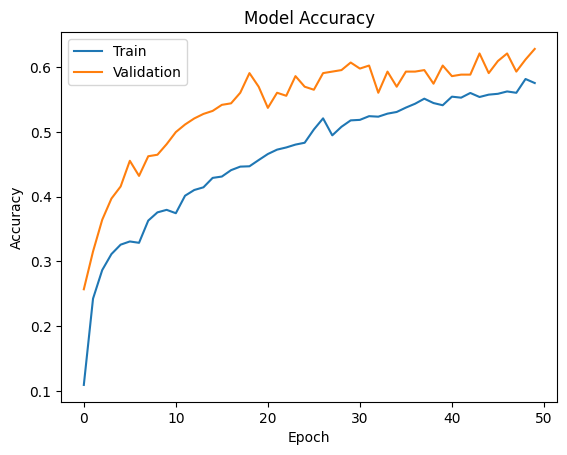

In [159]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:
- We see that model didnt overfit and validation dataset has done better than the training dataset.

**Evaluating the model on test data**

In [160]:
accuracy = model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 23ms/step - accuracy: 0.6105 - loss: 1.5133


**Generating the predictions using test data**

In [161]:
# Here we would get the output as probablities for each category
y_pred=model1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


**Plotting the Confusion Matrix**

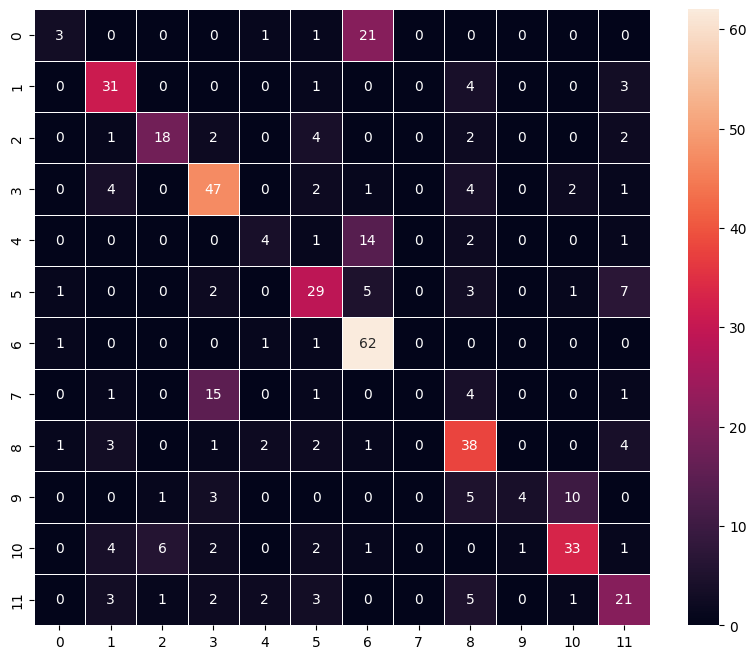

In [162]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observations:
- Class 0, 4, 7,9 10 and 11 are mostly misclassified
- Class 6 is well classified

**Evaluation Metrics**

In [163]:
#Build classification report
from sklearn.metrics import classification_report
from pprint import pprint

#print(classification_report(y_test_arg, y_pred_arg))
# Generate the classification report
model1_report = classification_report(y_test_arg, y_pred_arg, output_dict=True)
pprint(model1_report)
# Access overall precision, recall, and F1-score
overall_precision = model1_report['weighted avg']['precision']
overall_recall = model1_report['weighted avg']['recall']
overall_f1_score = model1_report['weighted avg']['f1-score']

overall_accuracy = model1_report['accuracy']

# Print the results
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1_score:.4f}")

{'0': {'f1-score': 0.1875,
       'precision': 0.5,
       'recall': 0.11538461538461539,
       'support': 26.0},
 '1': {'f1-score': 0.7209302325581396,
       'precision': 0.6595744680851063,
       'recall': 0.7948717948717948,
       'support': 39.0},
 '10': {'f1-score': 0.6804123711340208,
        'precision': 0.7021276595744681,
        'recall': 0.66,
        'support': 50.0},
 '11': {'f1-score': 0.5316455696202531,
        'precision': 0.5121951219512195,
        'recall': 0.5526315789473685,
        'support': 38.0},
 '2': {'f1-score': 0.6545454545454545,
       'precision': 0.6923076923076923,
       'recall': 0.6206896551724138,
       'support': 29.0},
 '3': {'f1-score': 0.6962962962962963,
       'precision': 0.6351351351351351,
       'recall': 0.7704918032786885,
       'support': 61.0},
 '4': {'f1-score': 0.25000000000000006,
       'precision': 0.4,
       'recall': 0.18181818181818182,
       'support': 22.0},
 '5': {'f1-score': 0.6105263157894737,
       'precision':

Observations:
- We see the following results for the basic model without data augmentation and without learning rate tuning
  - Overall Accuracy: 0.6105
  - Overall Precision: 0.5827
  - Overall Recall: 0.6105
  - Overall F1-score: 0.5698

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### Model 2 - With ReduceLRonPlateau function

In [164]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [165]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [166]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Intializing a sequential model
model2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model2.add(MaxPooling2D((2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model2.add(MaxPooling2D((2, 2)))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model2.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model2.add(Dense(12, activation='softmax'))

# Define the ReduceLROnPlateau callback
reduce_lr2 = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    factor=0.2,          # Factor by which to reduce the learning rate
    patience=5,          # Number of epochs with no improvement after which to reduce LR
    verbose=1,           # Print messages when LR is reduced
    min_lr=1e-6          # Minimum learning rate
)

# Compile your model
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train your model with the callback
history_2 = model2.fit(
    X_train_normalized, y_train_encoded,
    validation_data=(X_val_normalized, y_val_encoded),
    epochs=50,
    batch_size=32,
    callbacks=[reduce_lr2]  # Include the callback in the training
)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.1055 - loss: 2.4644 - val_accuracy: 0.2570 - val_loss: 2.3876 - learning_rate: 0.0010
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2241 - loss: 2.3152 - val_accuracy: 0.3551 - val_loss: 2.0322 - learning_rate: 0.0010
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3089 - loss: 2.0528 - val_accuracy: 0.3738 - val_loss: 1.9134 - learning_rate: 0.0010
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.3333 - loss: 1.9424 - val_accuracy: 0.4276 - val_loss: 1.7409 - learning_rate: 0.0010
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.3476 - loss: 1.8710 - val_accuracy: 0.4463 - val_loss: 1.6847 - learning_rate: 0.0010
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3590 - loss: 1.8219 - val_accuracy: 0.4650 - val_loss: 1.6018 - learning_rate: 0.0010
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.3731 - loss: 1.791

Observations:
- Testing accuracy is around 0.5274
- Validation accuracy is around 0.5958
- We see that ReduceLROnPlateau function has reduced the learning rate couple of times.

**Model Evaluation**

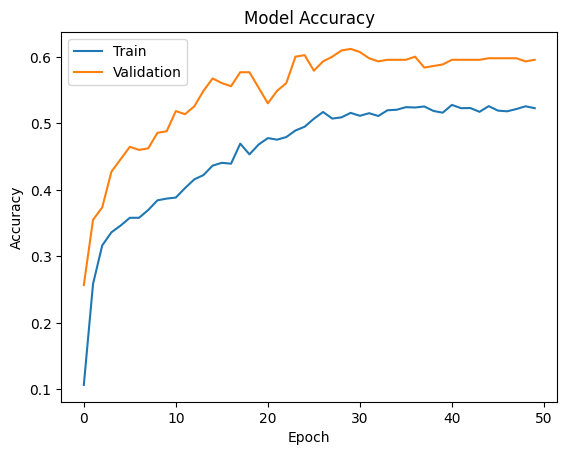

In [167]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:
- We see that the model didnt overfit.
- Model's validation dataset has peformed better than the trainining dataset.

**Evaluating the model on test data**


In [168]:
accuracy = model2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 23ms/step - accuracy: 0.6105 - loss: 1.2402


Observations:
- Test dataset accuracy is 0.6105

**Generating the predictions using test data**

In [169]:
# Here we would get the output as probablities for each category
y_pred=model2.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


**Plotting the Confusion Matrix**

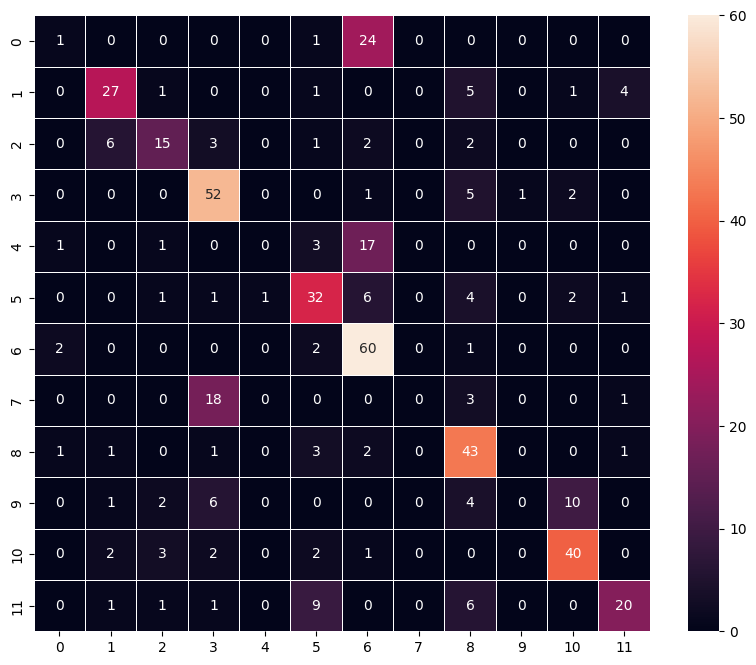

In [170]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observations:
- Class 4,9,7 and 1 are all misclassified.
- Class 3,6 and 10 are well classified

**Evaluation Metrics**

In [171]:
#Build classification report
from sklearn.metrics import classification_report
from pprint import pprint

#print(classification_report(y_test_arg, y_pred_arg))
# Generate the classification report
model2_report = classification_report(y_test_arg, y_pred_arg, output_dict=True)
pprint(model2_report)
# Access overall precision, recall, and F1-score
overall_precision = model2_report['weighted avg']['precision']
overall_recall = model2_report['weighted avg']['recall']
overall_f1_score = model2_report['weighted avg']['f1-score']

overall_accuracy = model2_report['accuracy']

# Print the results
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1_score:.4f}")

{'0': {'f1-score': 0.06451612903225806,
       'precision': 0.2,
       'recall': 0.038461538461538464,
       'support': 26.0},
 '1': {'f1-score': 0.7012987012987013,
       'precision': 0.7105263157894737,
       'recall': 0.6923076923076923,
       'support': 39.0},
 '10': {'f1-score': 0.761904761904762,
        'precision': 0.7272727272727273,
        'recall': 0.8,
        'support': 50.0},
 '11': {'f1-score': 0.6153846153846153,
        'precision': 0.7407407407407407,
        'recall': 0.5263157894736842,
        'support': 38.0},
 '2': {'f1-score': 0.5660377358490567,
       'precision': 0.625,
       'recall': 0.5172413793103449,
       'support': 29.0},
 '3': {'f1-score': 0.7172413793103448,
       'precision': 0.6190476190476191,
       'recall': 0.8524590163934426,
       'support': 61.0},
 '4': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 22.0},
 '5': {'f1-score': 0.627450980392157,
       'precision': 0.5925925925925926,
       'recall': 0.666666666666666

Observations:
- Model with ReduceLROnPlateau has the following performance metrics:
   - Overall Accuracy: 0.6105
   - Overall Precision: 0.5198
   - Overall Recall: 0.6105
   - Overall F1-score: 0.5482

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

### Model 3 - Full Training Data Augmentation(only rotation)

In [230]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [231]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='nearest'  # How to fill in newly created pixels
    )

# Apply data augmentation to your training data
train_generator = datagen.flow(
    X_train_normalized, y_train_encoded,
    seed=42,
    batch_size=32
)



In [232]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Intializing a sequential model
model3 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model3.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model3.add(MaxPooling2D((2, 2)))

model3.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model3.add(MaxPooling2D((2, 2)))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model3.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model3.add(Dense(16, activation='relu'))
model3.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model3.add(Dense(12, activation='softmax'))

# Define the ReduceLROnPlateau callback
reduce_lr3 = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    factor=0.2,          # Factor by which to reduce the learning rate
    patience=5,          # Number of epochs with no improvement after which to reduce LR
    verbose=1,           # Print messages when LR is reduced
    min_lr=1e-6          # Minimum learning rate
)

# Compile your model
model3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [233]:
epoch = 50

# Train the model with the callback
history_3 = model3.fit(
    train_generator,
    epochs=epoch,
    validation_data=(X_val_normalized, y_val_encoded),
    steps_per_epoch=len(train_generator),
    callbacks=[reduce_lr3],  # Include the callback in the training
    verbose=1
)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.1213 - loss: 2.4443 - val_accuracy: 0.2687 - val_loss: 2.1566 - learning_rate: 0.0010
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - accuracy: 0.2448 - loss: 2.1764 - val_accuracy: 0.3762 - val_loss: 1.9538 - learning_rate: 0.0010
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - accuracy: 0.2920 - loss: 2.0327 - val_accuracy: 0.4206 - val_loss: 1.8244 - learning_rate: 0.0010
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.3401 - loss: 1.9213 - val_accuracy: 0.4439 - val_loss: 1.7163 - learning_rate: 0.0010
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3480 - loss: 1.8392 - val_accuracy: 0.4439 - val_loss: 1.6464 - learning_rate: 0.0010
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.3623 - loss: 1.7823 - val_accuracy: 0.5093 - val_loss: 1.5319 - learning_rate: 0.0010
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.3708 - loss: 1.

Observations:
- Testing accuracy is around 0.5428
- Validation accuracy is around 0.6869
- We see that ReduceLROnPlateau function didnt get kicked off.

**Model Evaluation**

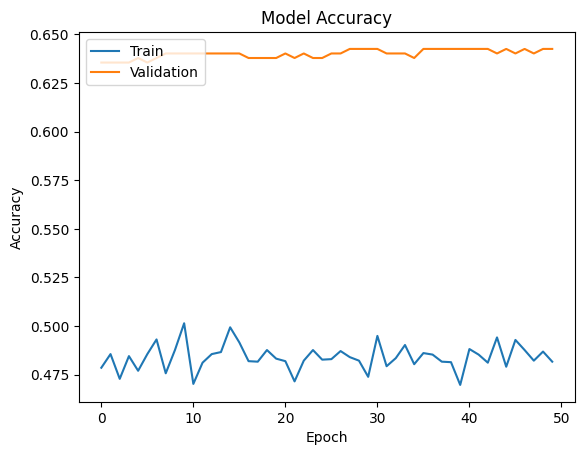

In [176]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:
- We see that the validation dataset has performed better than the training dataset.

**Evaluating the model on test data**

In [234]:
accuracy = model3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 22ms/step - accuracy: 0.6821 - loss: 1.0063


Observations:
- Testing dataset has an accuracy of 0.6821 and has performed better than training and validation dataset.

**Generating the predictions using test data**

In [235]:
# Here we would get the output as probablities for each category
y_pred=model3.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


**Plotting the Confusion Matrix**



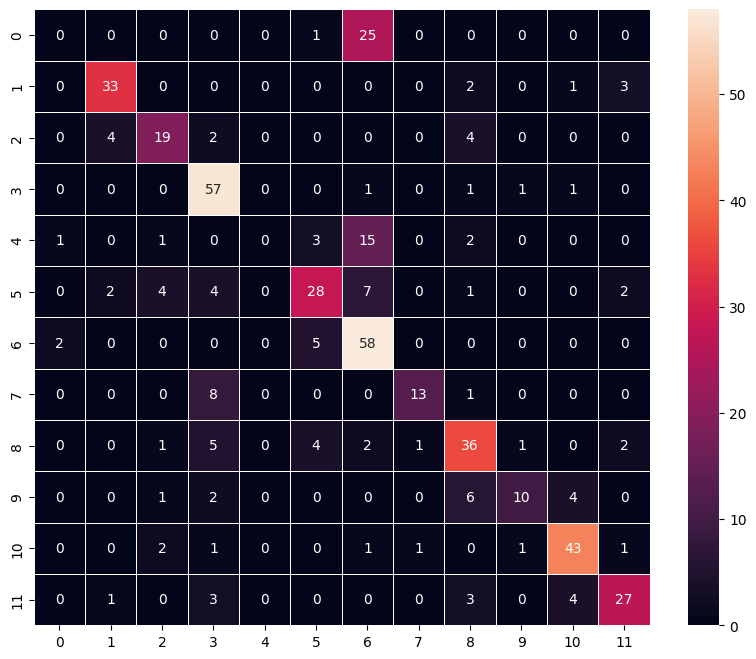

In [236]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observations:
- Class 0, 4, 5, 7 are mostly misclassified
- Class 1,2,3,6 are well classified

**Evaluation Matrix**

In [237]:
#Build classification report
from sklearn.metrics import classification_report
from pprint import pprint

#print(classification_report(y_test_arg, y_pred_arg))
# Generate the classification report
model3_report = classification_report(y_test_arg, y_pred_arg, output_dict=True)
pprint(model3_report)
# Access overall precision, recall, and F1-score
overall_precision = model3_report['weighted avg']['precision']
overall_recall = model3_report['weighted avg']['recall']
overall_f1_score = model3_report['weighted avg']['f1-score']

overall_accuracy = model3_report['accuracy']

# Print the results
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1_score:.4f}")

{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 26.0},
 '1': {'f1-score': 0.8354430379746836,
       'precision': 0.825,
       'recall': 0.8461538461538461,
       'support': 39.0},
 '10': {'f1-score': 0.8349514563106797,
        'precision': 0.8113207547169812,
        'recall': 0.86,
        'support': 50.0},
 '11': {'f1-score': 0.7397260273972601,
        'precision': 0.7714285714285715,
        'recall': 0.7105263157894737,
        'support': 38.0},
 '2': {'f1-score': 0.6666666666666666,
       'precision': 0.6785714285714286,
       'recall': 0.6551724137931034,
       'support': 29.0},
 '3': {'f1-score': 0.7972027972027972,
       'precision': 0.6951219512195121,
       'recall': 0.9344262295081968,
       'support': 61.0},
 '4': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 22.0},
 '5': {'f1-score': 0.6292134831460675,
       'precision': 0.6829268292682927,
       'recall': 0.5833333333333334,
       'support': 48.0},
 '6': {'f1-score': 0.66

Observations:
- Model with full training data augmentation has the following results:
   - Overall Accuracy: 0.6821
   - Overall Precision: 0.6351
   - Overall Recall: 0.6821
   - Overall F1-score: 0.6460

### Model 4 - Full training data augmentation with multiple augmentation techniques

In [181]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [182]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'  # How to fill in newly created pixels
    )

# Apply data augmentation to your training data
train_generator = datagen.flow(
    X_train_normalized, y_train_encoded,
    seed=42,
    batch_size=32
)



In [183]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Intializing a sequential model
model4 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model4.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model4.add(MaxPooling2D((2, 2)))

model4.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model4.add(MaxPooling2D((2, 2)))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model4.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model4.add(Dense(16, activation='relu'))
model4.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model4.add(Dense(12, activation='softmax'))

# Define the ReduceLROnPlateau callback
reduce_lr4 = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    factor=0.2,          # Factor by which to reduce the learning rate
    patience=5,          # Number of epochs with no improvement after which to reduce LR
    verbose=1,           # Print messages when LR is reduced
    min_lr=1e-6          # Minimum learning rate
)

# Compile your model
model4.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [184]:
epoch = 50

# Train the model with the callback
history_4 = model4.fit(
    train_generator,
    epochs=epoch,
    validation_data=(X_val_normalized, y_val_encoded),
    steps_per_epoch=len(train_generator),
    callbacks=[reduce_lr4],  # Include the callback in the training
    verbose=1
)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - accuracy: 0.1272 - loss: 2.4396 - val_accuracy: 0.3178 - val_loss: 2.1509 - learning_rate: 0.0010
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2805 - loss: 2.1950 - val_accuracy: 0.3879 - val_loss: 1.9153 - learning_rate: 0.0010
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2979 - loss: 2.0593 - val_accuracy: 0.3668 - val_loss: 1.8762 - learning_rate: 0.0010
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3096 - loss: 2.0018 - val_accuracy: 0.4159 - val_loss: 1.7869 - learning_rate: 0.0010
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.3146 - loss: 1.9514 - val_accuracy: 0.4252 - val_loss: 1.6667 - learning_rate: 0.0010
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3331 - loss: 1.8430 - val_accuracy: 0.4579 - val_loss: 1.5885 - learning_rate: 0.0010
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3196 - loss: 1

Observations:

- Testing accuracy is around 0.5428
- Validation accuracy is around 0.6869
- We see that ReduceLROnPlateau function reduces the learning rate multiple times.

**Model Evaluation**

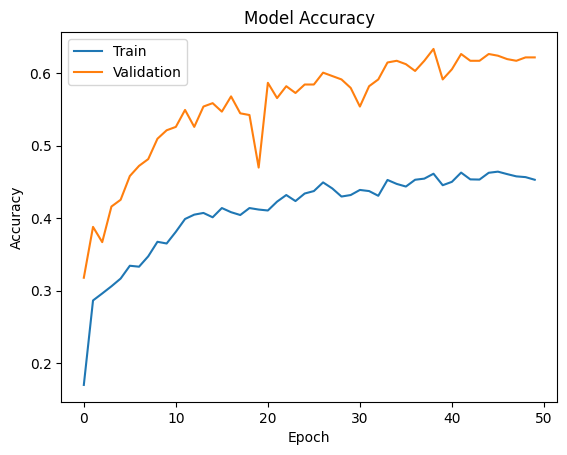

In [185]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:
- Model didnt overfit
- Validation dataset has performed better than the training dataset.

**Evaluating the model on test data**

In [186]:
accuracy = model4.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 21ms/step - accuracy: 0.6147 - loss: 1.2163


Observations:
- Testing dataset has an accuracy of 0.6147

**Generating the predictions using test data**

In [187]:
# Here we would get the output as probablities for each category
y_pred=model4.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


**Plotting the Confusion Matrix**



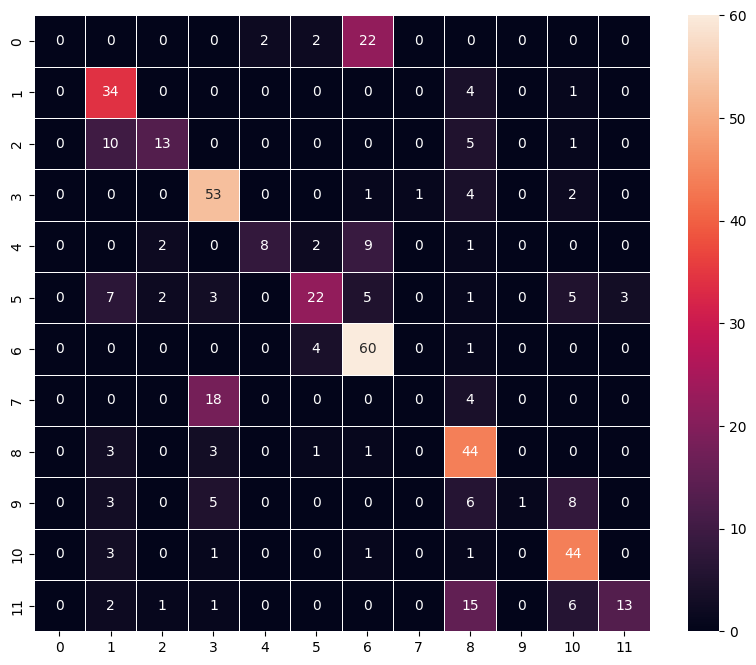

In [188]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observations:
- Class 0,4,7,9,11 are mostly misclassified
- Class 1,3,6,8,10 are well classified

**Evaluation Matrix**

In [189]:
#Build classification report
from sklearn.metrics import classification_report
from pprint import pprint

#print(classification_report(y_test_arg, y_pred_arg))
# Generate the classification report
model4_report = classification_report(y_test_arg, y_pred_arg, output_dict=True)
pprint(model4_report)
# Access overall precision, recall, and F1-score
overall_precision = model4_report['weighted avg']['precision']
overall_recall = model4_report['weighted avg']['recall']
overall_f1_score = model4_report['weighted avg']['f1-score']

overall_accuracy = model4_report['accuracy']

# Print the results
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1_score:.4f}")

{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 26.0},
 '1': {'f1-score': 0.6732673267326732,
       'precision': 0.5483870967741935,
       'recall': 0.8717948717948718,
       'support': 39.0},
 '10': {'f1-score': 0.7521367521367521,
        'precision': 0.6567164179104478,
        'recall': 0.88,
        'support': 50.0},
 '11': {'f1-score': 0.4814814814814815,
        'precision': 0.8125,
        'recall': 0.34210526315789475,
        'support': 38.0},
 '2': {'f1-score': 0.5531914893617021,
       'precision': 0.7222222222222222,
       'recall': 0.4482758620689655,
       'support': 29.0},
 '3': {'f1-score': 0.7310344827586208,
       'precision': 0.6309523809523809,
       'recall': 0.8688524590163934,
       'support': 61.0},
 '4': {'f1-score': 0.5000000000000001,
       'precision': 0.8,
       'recall': 0.36363636363636365,
       'support': 22.0},
 '5': {'f1-score': 0.5569620253164557,
       'precision': 0.7096774193548387,
       'recall': 0.458333333333

Observations:
  - Model 4 - Full training data augmentation with multiple augmentation techniques has the following results:
     - Overall Accuracy: 0.6147
     - Overall Precision: 0.6004
     - Overall Recall: 0.6147
     - Overall F1-score: 0.5540

### Model 5 - Data augmentation(multiple augmentation techniques) for minority classes

There is imbalance in the dataset. Perform Data augmentation to the minority classes

Perform the following steps:
1. Identify Minority classes - Use the information from the Barplot
2. Seperate data by class
3. Apply Augmentation to Minority classes
4. Combine Data - Combine the augmented data with the original data from the majority classes to create a new, more balanced training dataset

In [190]:
#display unique categories
y_train_encoded

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [191]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [192]:
# Intializing a sequential model
model5 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model5.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model5.add(MaxPooling2D((2, 2)))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model5.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model5.add(Dense(16, activation='relu'))
model5.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model5.add(Dense(12, activation='softmax'))

# Compile your model
model5.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [193]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 1. Identify Minority Classes
minority_classes = ["Cleavers", "Black-grass", "Shepherds Purse", "Common wheat", "Maize"]  # Replace with your actual minority classes

# 2. Separate Data by Class
X_train_minority = []
y_train_minority = []
X_train_majority = []
y_train_majority = []

# Get the original labels from y_train before one-hot encoding
original_labels = enc.inverse_transform(y_train_encoded)

# take X_train_normalized and y_train_encoded and split them into minority and majority classes
for image, label in zip(X_train_normalized, original_labels):
    if label in minority_classes:
        X_train_minority.append(image)
        y_train_minority.append(label)
    else:
        X_train_majority.append(image)
        y_train_majority.append(label)


X_train_minority = np.array(X_train_minority)
y_train_minority = np.array(y_train_minority)
X_train_majority = np.array(X_train_majority)
y_train_majority = np.array(y_train_majority)

# 3. Apply Augmentation to Minority Classes
minority_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator_minority = minority_datagen.flow(
    X_train_minority, y_train_minority,
    batch_size=32,
    seed=42
)

major_datagen = ImageDataGenerator() #no augmentation for majority class

train_generator_majority = major_datagen.flow(
    X_train_majority, y_train_majority,
    batch_size=32,
    seed=42
)

#define a function that combines the generators
def combined_generator(generator_minority, generator_majority, label_binarizer):
    while True:
        X_min, y_min = next(generator_minority)
        X_maj, y_maj = next(generator_majority)

        # Combine the batches
        X_combined = np.concatenate([X_min, X_maj])
        # One-hot encode the labels using the provided LabelBinarizer
        y_combined = np.concatenate([label_binarizer.transform(y_min), label_binarizer.transform(y_maj)]) # Encode labels here


        yield X_combined, y_combined

train_generator_combined = combined_generator(train_generator_minority, train_generator_majority,enc)

epochs = 50
# Calculate steps_per_epoch based on the size of your datasets
total_samples = len(X_train_minority) + len(X_train_majority)
batch_size = 32  # Your batch size
steps_per_epoch = math.ceil(total_samples / batch_size)  # Use math.ceil to round up

# Define the ReduceLROnPlateau callback
reduce_lr5 = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    factor=0.2,          # Factor by which to reduce the learning rate
    patience=5,          # Number of epochs with no improvement after which to reduce LR
    verbose=1,           # Print messages when LR is reduced
    min_lr=1e-6          # Minimum learning rate
)

history_5 = model5.fit(
    train_generator_combined,  # Use the combined generator
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[reduce_lr5]
)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.1305 - loss: 2.4246 - val_accuracy: 0.1121 - val_loss: 2.2854 - learning_rate: 0.0010
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.1985 - loss: 2.1814 - val_accuracy: 0.1285 - val_loss: 2.1751 - learning_rate: 0.0010
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.2150 - loss: 2.0658 - val_accuracy: 0.2453 - val_loss: 2.0144 - learning_rate: 0.0010
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - accuracy: 0.2515 - loss: 1.9533 - val_accuracy: 0.2336 - val_loss: 1.9205 - learning_rate: 0.0010
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.2509 - loss: 1.9376 - val_accuracy: 0.2407 - val_loss: 1.8280 - learning_rate: 0.0010
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.2725 - loss: 1.8791 - val_accuracy: 0.2547 - val_loss: 1.8589 - learning_rate: 0.0010
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.2813 - loss: 1

Observations:

- Testing accuracy is around 0.4647
- Validation accuracy is around 0.5467
- We see that ReduceLROnPlateau function reduces the learning rate multiple times.

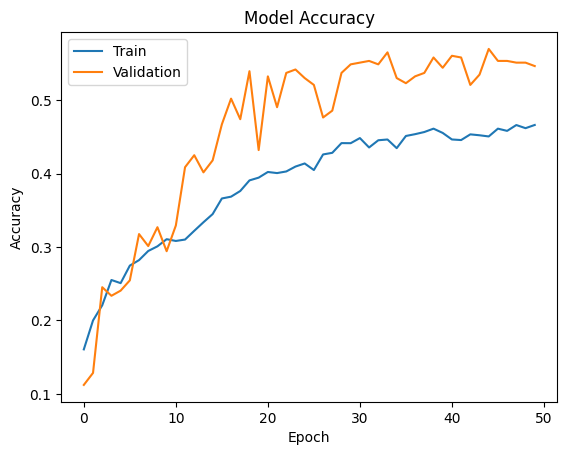

In [194]:
plt.plot(history_5.history['accuracy'])
plt.plot(history_5.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:
 - The Model didnt overfit
 - The Validation dataset performed than the training dataset

**Evaluating the model on test data**

In [195]:
accuracy = model5.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 23ms/step - accuracy: 0.5495 - loss: 1.2826


Observations:
- Testing dataset accuracy is 0.5495

**Generating the predictions using test data**

In [196]:
# Here we would get the output as probablities for each category
y_pred=model5.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


**Plotting the Confusion Matrix**



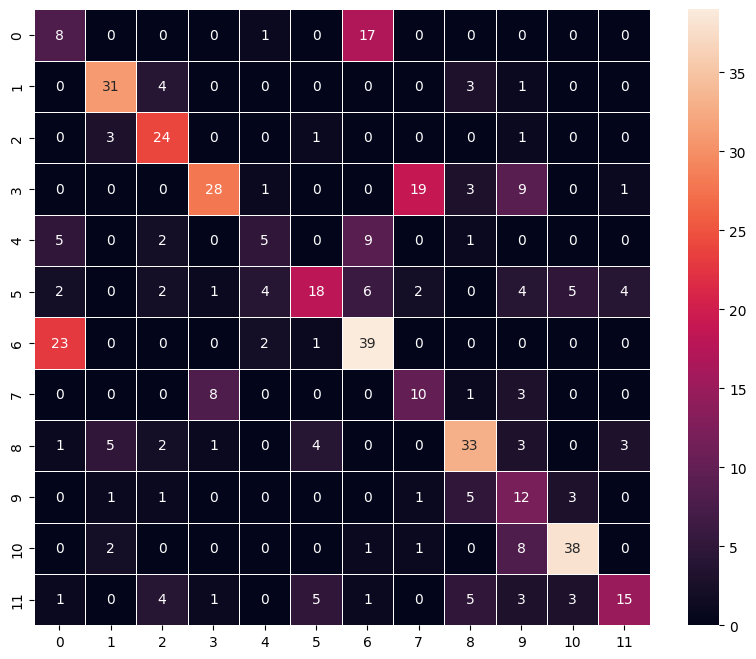

In [197]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observations:
- Class 0,4,3,6,7 are mostly misclassified
- Class 1, 2 are well classified

**Evaluation Matrix**

In [198]:
#Build classification report
from sklearn.metrics import classification_report
from pprint import pprint

#print(classification_report(y_test_arg, y_pred_arg))
# Generate the classification report
model5_report = classification_report(y_test_arg, y_pred_arg, output_dict=True)
pprint(model5_report)
# Access overall precision, recall, and F1-score
overall_precision = model5_report['weighted avg']['precision']
overall_recall = model5_report['weighted avg']['recall']
overall_f1_score = model5_report['weighted avg']['f1-score']

overall_accuracy = model5_report['accuracy']

# Print the results
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1_score:.4f}")

{'0': {'f1-score': 0.24242424242424246,
       'precision': 0.2,
       'recall': 0.3076923076923077,
       'support': 26.0},
 '1': {'f1-score': 0.7654320987654322,
       'precision': 0.7380952380952381,
       'recall': 0.7948717948717948,
       'support': 39.0},
 '10': {'f1-score': 0.7676767676767676,
        'precision': 0.7755102040816326,
        'recall': 0.76,
        'support': 50.0},
 '11': {'f1-score': 0.49180327868852464,
        'precision': 0.6521739130434783,
        'recall': 0.39473684210526316,
        'support': 38.0},
 '2': {'f1-score': 0.7058823529411765,
       'precision': 0.6153846153846154,
       'recall': 0.8275862068965517,
       'support': 29.0},
 '3': {'f1-score': 0.5599999999999999,
       'precision': 0.717948717948718,
       'recall': 0.45901639344262296,
       'support': 61.0},
 '4': {'f1-score': 0.2857142857142857,
       'precision': 0.38461538461538464,
       'recall': 0.22727272727272727,
       'support': 22.0},
 '5': {'f1-score': 0.46753246

Observations:
- Model 5 - Data augmentation(multiple augmentation technqiues) for minority classes have the following results:
  - Overall Accuracy: 0.5495
  - Overall Precision: 0.5868
  - Overall Recall: 0.5495
  - Overall F1-score: 0.5534

### Model 6 - Data augmentation(only rotation) for minority classes

In [199]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [200]:
# Intializing a sequential model
model6 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model6.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model6.add(MaxPooling2D((2, 2)))

model6.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model6.add(MaxPooling2D((2, 2)))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model6.add(Flatten())

# Adding a fully connected dense layer with 100 neurons
model6.add(Dense(16, activation='relu'))
model6.add(Dropout(0.3))
# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
model6.add(Dense(12, activation='softmax'))

# Compile your model
model6.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [201]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# 1. Identify Minority Classes
minority_classes = ["Cleavers", "Black-grass", "Shepherds Purse", "Common wheat", "Maize"]  # Replace with your actual minority classes

# 2. Separate Data by Class
X_train_minority = []
y_train_minority = []
X_train_majority = []
y_train_majority = []

# Get the original labels from y_train before one-hot encoding
original_labels = enc.inverse_transform(y_train_encoded)

# take X_train_normalized and y_train_encoded and split them into minority and majority classes
for image, label in zip(X_train_normalized, original_labels):
    if label in minority_classes:
        X_train_minority.append(image)
        y_train_minority.append(label)
    else:
        X_train_majority.append(image)
        y_train_majority.append(label)


X_train_minority = np.array(X_train_minority)
y_train_minority = np.array(y_train_minority)
X_train_majority = np.array(X_train_majority)
y_train_majority = np.array(y_train_majority)

# 3. Apply Augmentation to Minority Classes
minority_datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='nearest'
)

train_generator_minority = minority_datagen.flow(
    X_train_minority, y_train_minority,
    batch_size=32,
    seed=42
)

major_datagen = ImageDataGenerator() #no augmentation for majority class

train_generator_majority = major_datagen.flow(
    X_train_majority, y_train_majority,
    batch_size=32,
    seed=42
)

#define a function that combines the generators
def combined_generator(generator_minority, generator_majority, label_binarizer):
    while True:
        X_min, y_min = next(generator_minority)
        X_maj, y_maj = next(generator_majority)

        # Combine the batches
        X_combined = np.concatenate([X_min, X_maj])
        # One-hot encode the labels using the provided LabelBinarizer
        y_combined = np.concatenate([label_binarizer.transform(y_min), label_binarizer.transform(y_maj)]) # Encode labels here


        yield X_combined, y_combined

train_generator_combined = combined_generator(train_generator_minority, train_generator_majority,enc)

epochs = 50
# Calculate steps_per_epoch based on the size of your datasets
total_samples = len(X_train_minority) + len(X_train_majority)
batch_size = 32  # Your batch size
steps_per_epoch = math.ceil(total_samples / batch_size)  # Use math.ceil to round up

# Define the ReduceLROnPlateau callback
reduce_lr6 = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    factor=0.2,          # Factor by which to reduce the learning rate
    patience=5,          # Number of epochs with no improvement after which to reduce LR
    verbose=1,           # Print messages when LR is reduced
    min_lr=1e-6          # Minimum learning rate
)

history_6 = model6.fit(
    train_generator_combined,  # Use the combined generator
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[reduce_lr6]
)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - accuracy: 0.1378 - loss: 2.4106 - val_accuracy: 0.1121 - val_loss: 2.2861 - learning_rate: 0.0010
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - accuracy: 0.2037 - loss: 2.1556 - val_accuracy: 0.1542 - val_loss: 2.1510 - learning_rate: 0.0010
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.2381 - loss: 2.0107 - val_accuracy: 0.2944 - val_loss: 1.9211 - learning_rate: 0.0010
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.2913 - loss: 1.8674 - val_accuracy: 0.3248 - val_loss: 1.7883 - learning_rate: 0.0010
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.2952 - loss: 1.8255 - val_accuracy: 0.3832 - val_loss: 1.6893 - learning_rate: 0.0010
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3275 - loss: 1.7590 - val_accuracy: 0.3972 - val_loss: 1.6417 - learning_rate: 0.0010
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.3355 - loss: 1

Observations:
- Testing accuracy is around 0.5624
- Validation accuracy is around 0.5981
- We see that ReduceLROnPlateau function has reduced the learning rate couple of times.

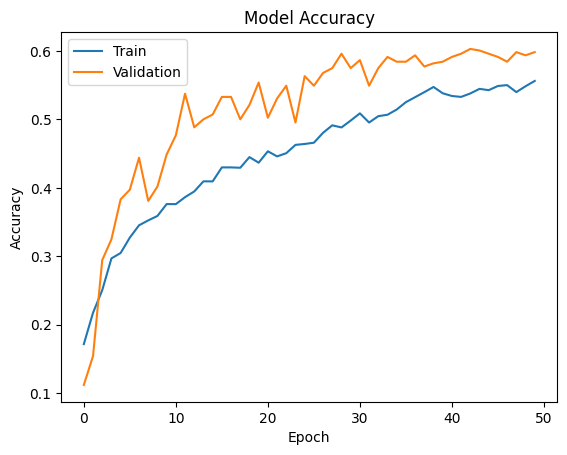

In [202]:
plt.plot(history_6.history['accuracy'])
plt.plot(history_6.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:
- Model didnt overfit
- Validation dataset has performed better than training dataset

**Evaluating the model on test data**

In [203]:
accuracy = model6.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 0s - 22ms/step - accuracy: 0.5979 - loss: 1.3247


Observations:
- Testing dataset accuracy is 0.5979

**Generating the predictions using test data**

In [204]:
# Here we would get the output as probablities for each category
y_pred=model6.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


**Plotting the Confusion Matrix**



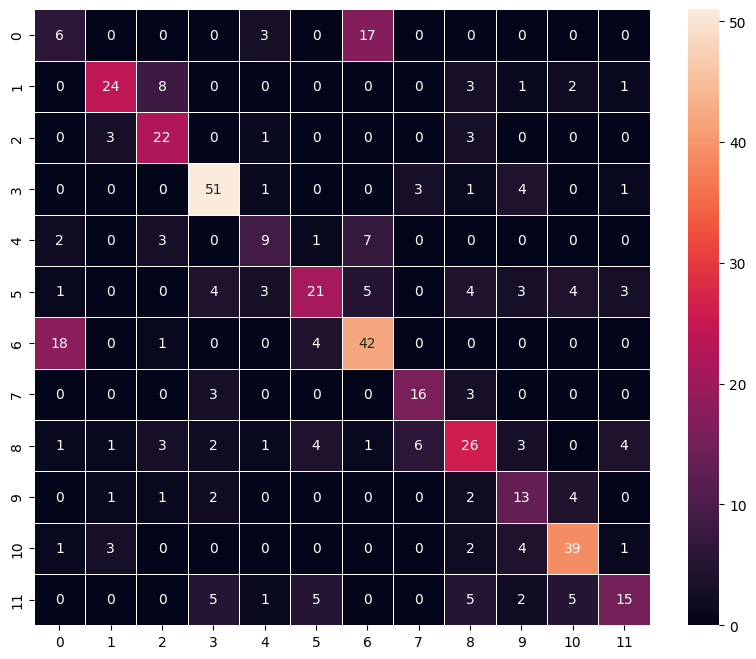

In [205]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observations:
- Class 0,4,6,11 are mostly misclassified
- Class 3, 10, 7 are well classified

**Evaluation Matrix**

In [206]:
#Build classification report
from sklearn.metrics import classification_report
from pprint import pprint

#print(classification_report(y_test_arg, y_pred_arg))
# Generate the classification report
model6_report = classification_report(y_test_arg, y_pred_arg, output_dict=True)
pprint(model6_report)
# Access overall precision, recall, and F1-score
overall_precision = model6_report['weighted avg']['precision']
overall_recall = model6_report['weighted avg']['recall']
overall_f1_score = model6_report['weighted avg']['f1-score']

overall_accuracy = model6_report['accuracy']

# Print the results
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1_score:.4f}")

{'0': {'f1-score': 0.21818181818181817,
       'precision': 0.20689655172413793,
       'recall': 0.23076923076923078,
       'support': 26.0},
 '1': {'f1-score': 0.676056338028169,
       'precision': 0.75,
       'recall': 0.6153846153846154,
       'support': 39.0},
 '10': {'f1-score': 0.7500000000000001,
        'precision': 0.7222222222222222,
        'recall': 0.78,
        'support': 50.0},
 '11': {'f1-score': 0.47619047619047616,
        'precision': 0.6,
        'recall': 0.39473684210526316,
        'support': 38.0},
 '2': {'f1-score': 0.6567164179104478,
       'precision': 0.5789473684210527,
       'recall': 0.7586206896551724,
       'support': 29.0},
 '3': {'f1-score': 0.796875,
       'precision': 0.7611940298507462,
       'recall': 0.8360655737704918,
       'support': 61.0},
 '4': {'f1-score': 0.43902439024390244,
       'precision': 0.47368421052631576,
       'recall': 0.4090909090909091,
       'support': 22.0},
 '5': {'f1-score': 0.5060240963855421,
       'preci

Observations:
- Model with Data augmentation(only rotation) for minority classes have the following results:
  - Overall Accuracy: 0.5979
  - Overall Precision: 0.6011
  - Overall Recall: 0.5979
  - Overall F1-score: 0.5939

### Model 7 - Transfer Learning using VGG Model and Data augmentation for minority classes

In [207]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [208]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Observations:
- Did transfer learning using VGG Model. We see that there are 14,714,688 trainable parameters and we have included only the convulutional layers (include_top = FALSE)

In [209]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [210]:
new_model = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model.add(Flatten())

# Adding a dense output layer
new_model.add(Dense(32, activation='relu'))
new_model.add(Dropout(0.2))
new_model.add(Dense(16, activation='relu'))
new_model.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,988 (56.38 MB)

 Trainable params: 66,300 (258.98 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [211]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# 1. Identify Minority Classes
minority_classes = ["Cleavers", "Black-grass", "Shepherds Purse", "Common wheat", "Maize"]  # Replace with your actual minority classes

# 2. Separate Data by Class
X_train_minority = []
y_train_minority = []
X_train_majority = []
y_train_majority = []

# Get the original labels from y_train before one-hot encoding
original_labels = enc.inverse_transform(y_train_encoded)

# take X_train_normalized and y_train_encoded and split them into minority and majority classes
for image, label in zip(X_train_normalized, original_labels):
    if label in minority_classes:
        X_train_minority.append(image)
        y_train_minority.append(label)
    else:
        X_train_majority.append(image)
        y_train_majority.append(label)


X_train_minority = np.array(X_train_minority)
y_train_minority = np.array(y_train_minority)
X_train_majority = np.array(X_train_majority)
y_train_majority = np.array(y_train_majority)

# 3. Apply Augmentation to Minority Classes
minority_datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='nearest'
)

train_generator_minority = minority_datagen.flow(
    X_train_minority, y_train_minority,
    batch_size=32,
    seed=42
)

major_datagen = ImageDataGenerator() #no augmentation for majority class

train_generator_majority = major_datagen.flow(
    X_train_majority, y_train_majority,
    batch_size=32,
    seed=42
)

#define a function that combines the generators
def combined_generator(generator_minority, generator_majority, label_binarizer):
    while True:
        X_min, y_min = next(generator_minority)
        X_maj, y_maj = next(generator_majority)

        # Combine the batches
        X_combined = np.concatenate([X_min, X_maj])
        # One-hot encode the labels using the provided LabelBinarizer
        y_combined = np.concatenate([label_binarizer.transform(y_min), label_binarizer.transform(y_maj)]) # Encode labels here


        yield X_combined, y_combined

train_generator_combined = combined_generator(train_generator_minority, train_generator_majority,enc)

epochs = 50
# Calculate steps_per_epoch based on the size of your datasets
total_samples = len(X_train_minority) + len(X_train_majority)
batch_size = 32  # Your batch size
steps_per_epoch = math.ceil(total_samples / batch_size)  # Use math.ceil to round up

# Define the ReduceLROnPlateau callback
reduce_lr7 = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    factor=0.2,          # Factor by which to reduce the learning rate
    patience=5,          # Number of epochs with no improvement after which to reduce LR
    verbose=1,           # Print messages when LR is reduced
    min_lr=1e-6          # Minimum learning rate
)

history_7 = new_model.fit(
    train_generator_combined,  # Use the combined generator
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=(X_val_normalized, y_val_encoded),
    callbacks=[reduce_lr7]
)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.1778 - loss: 2.3611 - val_accuracy: 0.2944 - val_loss: 2.0361 - learning_rate: 0.0010
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.3896 - loss: 1.7530 - val_accuracy: 0.3879 - val_loss: 1.7818 - learning_rate: 0.0010
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.4812 - loss: 1.4675 - val_accuracy: 0.3832 - val_loss: 1.6999 - learning_rate: 0.0010
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.5360 - loss: 1.3043 - val_accuracy: 0.4229 - val_loss: 1.6123 - learning_rate: 0.0010
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.5794 - loss: 1.2146 - val_accuracy: 0.4626 - val_loss: 1.5378 - learning_rate: 0.0010
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6049 - loss: 1.1178 - val_accuracy: 0.4509 - val_loss: 1.5337 - learning_rate: 0.0010
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.6169 - loss: 1

Observations:

- Testing accuracy is around 0.8189
- Validation accuracy is around 0.5864
- We see that ReduceLROnPlateau function reduces the learning rate multiple times.


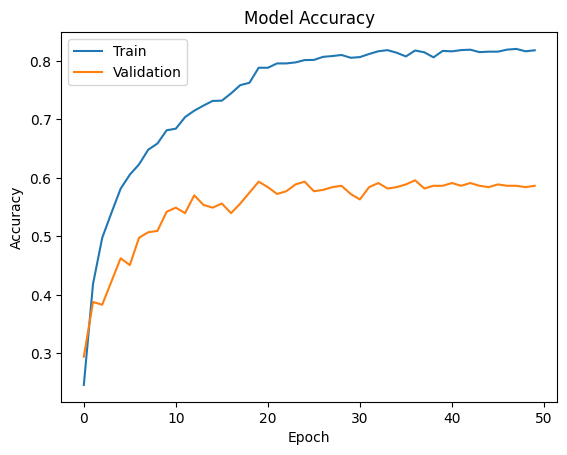

In [212]:
plt.plot(history_7.history['accuracy'])
plt.plot(history_7.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:
- We see that the model overfitted
- The validation dataset hasnt performed well when compared to training dataset.

**Evaluating the model on test data**

In [213]:
accuracy = new_model.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 51ms/step - accuracy: 0.6316 - loss: 1.2302


Observations:
- Testing dataset accuracy is 0.6316

**Generating the predictions using test data**

In [214]:
# Here we would get the output as probablities for each category
y_pred=new_model.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


**Plotting the Confusion Matrix**



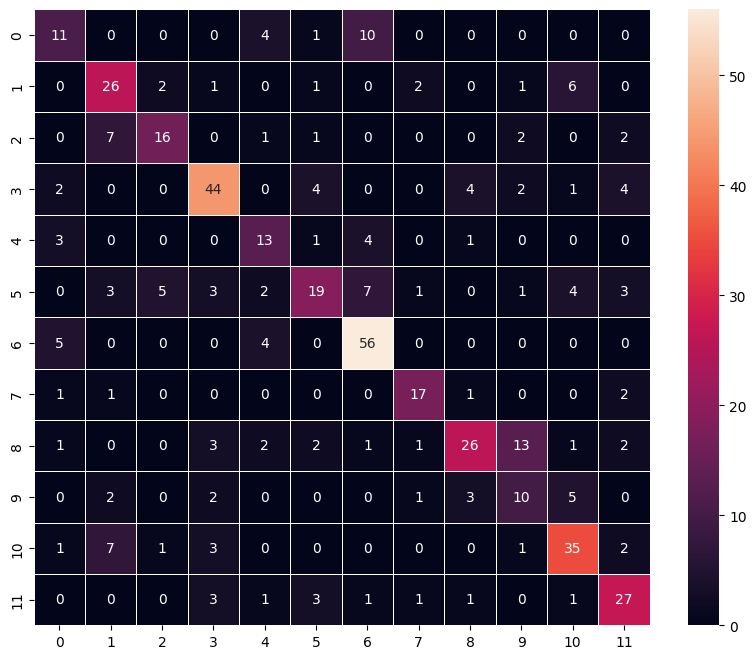

In [215]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observations:
- Class 0,2,4,5 are mostly misclassified
- Class 3,6 are well classified

**Evaluation Matrix**

In [216]:
#Build classification report
from sklearn.metrics import classification_report
from pprint import pprint

#print(classification_report(y_test_arg, y_pred_arg))
# Generate the classification report
model7_report = classification_report(y_test_arg, y_pred_arg, output_dict=True)
pprint(model7_report)
# Access overall precision, recall, and F1-score
overall_precision = model7_report['weighted avg']['precision']
overall_recall = model7_report['weighted avg']['recall']
overall_f1_score = model7_report['weighted avg']['f1-score']

overall_accuracy = model7_report['accuracy']

# Print the results
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1_score:.4f}")

{'0': {'f1-score': 0.43999999999999995,
       'precision': 0.4583333333333333,
       'recall': 0.4230769230769231,
       'support': 26.0},
 '1': {'f1-score': 0.6117647058823529,
       'precision': 0.5652173913043478,
       'recall': 0.6666666666666666,
       'support': 39.0},
 '10': {'f1-score': 0.6796116504854369,
        'precision': 0.660377358490566,
        'recall': 0.7,
        'support': 50.0},
 '11': {'f1-score': 0.6749999999999999,
        'precision': 0.6428571428571429,
        'recall': 0.7105263157894737,
        'support': 38.0},
 '2': {'f1-score': 0.6037735849056604,
       'precision': 0.6666666666666666,
       'recall': 0.5517241379310345,
       'support': 29.0},
 '3': {'f1-score': 0.7333333333333334,
       'precision': 0.7457627118644068,
       'recall': 0.7213114754098361,
       'support': 61.0},
 '4': {'f1-score': 0.5306122448979591,
       'precision': 0.48148148148148145,
       'recall': 0.5909090909090909,
       'support': 22.0},
 '5': {'f1-score': 

Observations:
 - Model - Transfer Learning using VGG Model and Data augmentation for minority classes has the following results:
    - Overall Accuracy: 0.6316
    - Overall Precision: 0.6377
    - Overall Recall: 0.6316
    - Overall F1-score: 0.6279

### Model 8 - Transfer Learning using VGG Model and Data augmentation for full training dataset

In [217]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [218]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Observations:
- Did transfer learning using VGG Model. We see that there are 14,714,688 trainable parameters and we have included only the convulutional layers (include_top = FALSE)

In [219]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [220]:
new_model1 = Sequential()

# Adding the convolutional part of the VGG16 model from above
new_model1.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
new_model1.add(Flatten())

# Adding a dense output layer
new_model1.add(Dense(32, activation='relu'))
new_model1.add(Dropout(0.2))
new_model1.add(Dense(16, activation='relu'))
new_model1.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
new_model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
new_model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          65,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 12)                  │             204 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,780,988 (56.38 MB)

 Trainable params: 66,300 (258.98 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [221]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='nearest'  # How to fill in newly created pixels
    )

# Apply data augmentation to your training data
train_generator = datagen.flow(
    X_train_normalized, y_train_encoded,
    seed=42,
    batch_size=32
)



In [222]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    factor=0.2,          # Factor by which to reduce the learning rate
    patience=5,          # Number of epochs with no improvement after which to reduce LR
    verbose=1,           # Print messages when LR is reduced
    min_lr=1e-6          # Minimum learning rate
)


In [223]:
epoch = 50

# Train the model with the callback
history_8 = new_model1.fit(
    train_generator,
    epochs=epoch,
    validation_data=(X_val_normalized, y_val_encoded),
    steps_per_epoch=len(train_generator),
    callbacks=[reduce_lr],  # Include the callback in the training
    verbose=1
)

Epoch 1/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.1636 - loss: 2.3865 - val_accuracy: 0.3248 - val_loss: 2.0090 - learning_rate: 0.0010
Epoch 2/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.3484 - loss: 1.9228 - val_accuracy: 0.4089 - val_loss: 1.7857 - learning_rate: 0.0010
Epoch 3/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3761 - loss: 1.7651 - val_accuracy: 0.4229 - val_loss: 1.6689 - learning_rate: 0.0010
Epoch 4/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4208 - loss: 1.6368 - val_accuracy: 0.4299 - val_loss: 1.6315 - learning_rate: 0.0010
Epoch 5/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.4302 - loss: 1.5847 - val_accuracy: 0.4416 - val_loss: 1.5596 - learning_rate: 0.0010
Epoch 6/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.4645 - loss: 1.4996 - val_accuracy: 0.4603 - val_loss: 1.5294 - learning_rate: 0.0010
Epoch 7/50
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.4936 - loss: 1

Observations:

- Testing accuracy is around 0.6919
- Validation accuracy is around 0.6425
- We see that ReduceLROnPlateau function didnt get kicked off.

**Model Evaluation**

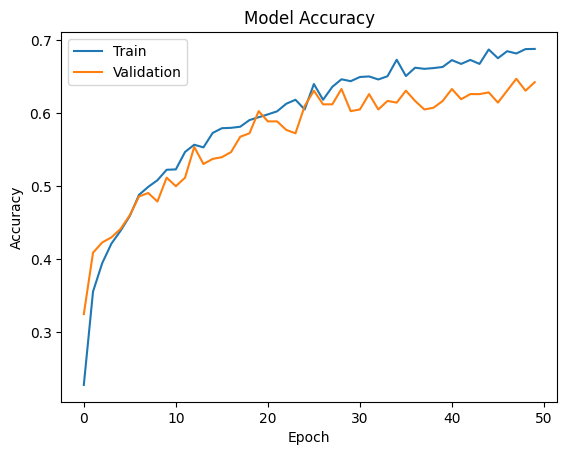

In [224]:
plt.plot(history_8.history['accuracy'])
plt.plot(history_8.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Observations:
- The performance of validation dataset is pretty close to the training dataset.

**Evaluating the model on test data**

In [225]:
accuracy = new_model1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

15/15 - 1s - 46ms/step - accuracy: 0.6042 - loss: 1.2472


Observations:
- Testing dataset has an accuracy of 0.6042

**Generating the predictions using test data**

In [226]:
# Here we would get the output as probablities for each category
y_pred=new_model1.predict(X_test_normalized)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step


**Plotting the Confusion Matrix**



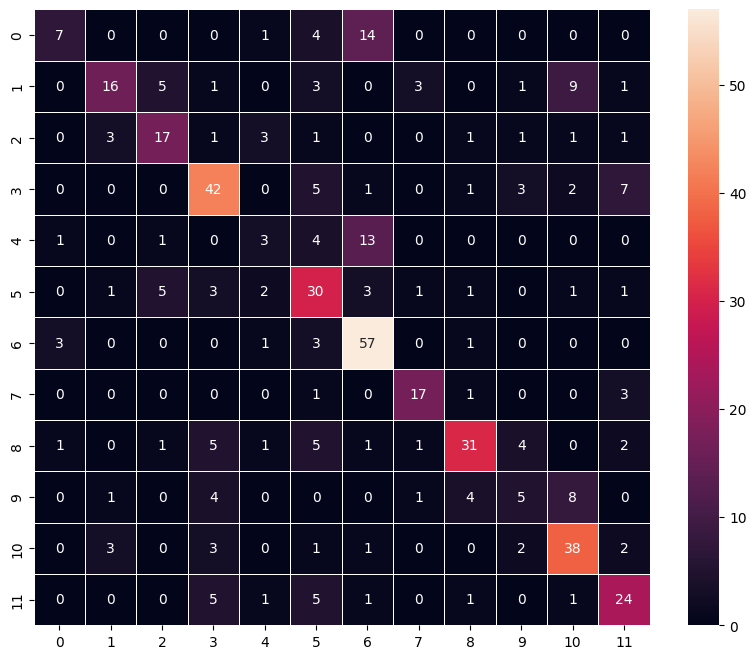

In [227]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg=np.argmax(y_pred,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

Observations:
- Class 0,4,9 are mostly misclassified
- Class 3, 6, 10 are well classified

**Evaluation Matrix**

In [228]:
#Build classification report
from sklearn.metrics import classification_report
from pprint import pprint

#print(classification_report(y_test_arg, y_pred_arg))
# Generate the classification report
model8_report = classification_report(y_test_arg, y_pred_arg, output_dict=True)
pprint(model8_report)
# Access overall precision, recall, and F1-score
overall_precision = model8_report['weighted avg']['precision']
overall_recall = model8_report['weighted avg']['recall']
overall_f1_score = model8_report['weighted avg']['f1-score']

overall_accuracy = model8_report['accuracy']

# Print the results
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1_score:.4f}")

{'0': {'f1-score': 0.3684210526315789,
       'precision': 0.5833333333333334,
       'recall': 0.2692307692307692,
       'support': 26.0},
 '1': {'f1-score': 0.5079365079365079,
       'precision': 0.6666666666666666,
       'recall': 0.41025641025641024,
       'support': 39.0},
 '10': {'f1-score': 0.6909090909090909,
        'precision': 0.6333333333333333,
        'recall': 0.76,
        'support': 50.0},
 '11': {'f1-score': 0.6075949367088608,
        'precision': 0.5853658536585366,
        'recall': 0.631578947368421,
        'support': 38.0},
 '2': {'f1-score': 0.5862068965517241,
       'precision': 0.5862068965517241,
       'recall': 0.5862068965517241,
       'support': 29.0},
 '3': {'f1-score': 0.672,
       'precision': 0.65625,
       'recall': 0.6885245901639344,
       'support': 61.0},
 '4': {'f1-score': 0.1764705882352941,
       'precision': 0.25,
       'recall': 0.13636363636363635,
       'support': 22.0},
 '5': {'f1-score': 0.5454545454545454,
       'precision

Observations:
- Model - Transfer Learning using VGG Model and Data augmentation for full training dataset has the following results:
  - Overall Accuracy: 0.6042
  - Overall Precision: 0.5986
  - Overall Recall: 0.6042
  - Overall F1-score: 0.5890

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

We have built 8 models:
1. Model 1 - Basic Model without Augmentation and Performance Tuning
2. Model 2 - With ReduceLRonPlateau function
3. Model 3 - Full Training Data Augmentation(only rotation)
4. Model 4 - Full training data augmentation with multiple augmentation techniques
5. Model 5 - Data augmentation(multiple augmentation technqiues) for minority classes
6. Model 6 - Data augmentation(only rotation) for minority classes
7. Model 7 - Transfer Learning using VGG Model and Data augmentation for minority classes
8. Model 8 - Transfer Learning using VGG Model and Data augmentation for full training dataset

In [238]:
# Store the reports in a list
reports = [model1_report, model2_report, model3_report, model4_report, model5_report, model6_report, model7_report, model8_report]

# Extract relevant metrics and create a DataFrame
data = []
for i, report in enumerate(reports):
    overall_accuracy = report['accuracy']
    overall_precision = report['weighted avg']['precision']
    overall_recall = report['weighted avg']['recall']
    overall_f1_score = report['weighted avg']['f1-score']

    data.append([f"Model {i + 1}", overall_accuracy, overall_precision, overall_recall, overall_f1_score])

df = pd.DataFrame(data, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

# Display the DataFrame
print(df)

     Model  Accuracy  Precision    Recall  F1-Score
0  Model 1  0.610526   0.582745  0.610526  0.569829
1  Model 2  0.610526   0.519783  0.610526  0.548187
2  Model 3  0.682105   0.635140  0.682105  0.645982
3  Model 4  0.614737   0.600408  0.614737  0.554037
4  Model 5  0.549474   0.586846  0.549474  0.553439
5  Model 6  0.597895   0.601135  0.597895  0.593945
6  Model 7  0.631579   0.637651  0.631579  0.627853
7  Model 8  0.604211   0.598556  0.604211  0.588979


Observations:
- Based on the above results, we see that Model 3 - Full Training Data Augmentation(only rotation) has the highest accuracy of 0.6821. The second metric of interest is F1 score and we see that Model 3 - Full Training Data Augmentation(only rotation) has the highest F1 score.

- Top 3 models based on Accuracy are:
   - Model 3 - Full Training Data Augmentation(only rotation) - 0.6821
   - Model 7 - Transfer Learning using VGG Model and Data  augmentation for minority classes - 0.6316
   - Model 4 - Full training data augmentation with multiple augmentation techniques - 0.6147

### Visualizing the prediction

Choose the best model which is Model 3 to visualize the prediction

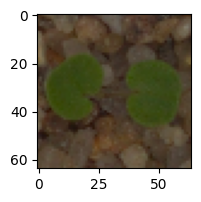

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


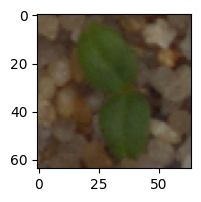

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted Label ['Cleavers']
True Label Cleavers


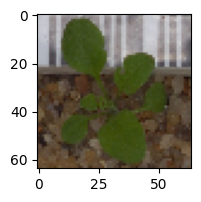

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted Label ['Shepherds Purse']
True Label Shepherds Purse


In [239]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model3.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

Observation:
- We see the predicted value and the true value of the images. We see that the images selected have both the values the same.

## Actionable Insights and Business Recommendations

- We saw that the Model where we did Data augmentation for entire training set performed better than other models. It has the highest accuracy of 0.6821.
- We see that transfer learning using VGG 16 was not the top performer . It might be that VGG 16 is not the best model for identifing plant species.
- I would recommend to look for  models which is well trained for plant species and then use them for transfer learning to achieve higher results.
- The models can be further improved by training with different filter sizes and different number of filters.
- With more computational power, we can try and train the models with original image sizes to see if we can achieve better performance.

_____